In [85]:
# imports n' shit

import pandas as pd
import numpy as np
import pylab
import matplotlib.pyplot as plt
import scipy as sp
from scipy.signal import find_peaks, peak_prominences
import math as math
from scipy.optimize import curve_fit
from scipy import asarray as ar,exp
from scipy.optimize import curve_fit, minimize_scalar
from scipy.stats import linregress


# Ba-133
df1 = pd.read_csv('Burger Dam Ba 133.txt', skiprows = 1, sep = '\t', header = None, names = ['Channel', 'Energy', 'Counts', 'Rate'])

# Cd-109
df2 = pd.read_csv('Burger Dam Cd 109.txt', skiprows = 27, sep = '\t', header = None, names = ['Channel', 'Energy', 'Counts', 'Rate'])

# Co-60
df3 = pd.read_csv('Burger Dam Co 60.txt', skiprows = 27, sep = '\t', header = None, names = ['Channel', 'Energy', 'Counts', 'Rate'])

# Mn-54
df4 = pd.read_csv('Burger Dam Mn 54.txt', skiprows = 27, sep = '\t', header = None, names = ['Channel', 'Energy', 'Counts', 'Rate'])

# Na-22
df5 = pd.read_csv('Burger Dam Na 22.txt', skiprows = 27, sep = '\t', header = None, names = ['Channel', 'Energy', 'Counts', 'Rate'])

# Unknown
df6 = pd.read_csv('Burger Dam Unknown.txt', skiprows = 27, sep = '\t', header = None, names = ['Channel', 'Energy', 'Counts', 'Rate'])

print(df1)
print(df2)
print(df3)
print(df4)
print(df5)
print(df6)

      Channel    Energy    Counts          Rate
0           1   -23.078       643      2.143330
1           2   -21.036      1334      4.446670
2           3   -18.994   2105787   7019.290000
3           4   -16.952  19652536  65508.500000
4           5   -14.910   4531744  15105.800000
...       ...       ...       ...           ...
1019     1020  2057.890         0      0.000000
1020     1021  2059.933         0      0.000000
1021     1022  2061.975         1      0.003333
1022     1023  2064.017         0      0.000000
1023     1024  2066.059         0      0.000000

[1024 rows x 4 columns]
      Channel    Energy    Counts          Rate
0           1   -23.078       814      2.713330
1           2   -21.036      1489      4.963330
2           3   -18.994   1360128   4533.760000
3           4   -16.952  28338559  94461.900000
4           5   -14.910   7589684  25298.900000
...       ...       ...       ...           ...
1019     1020  2057.890         1      0.003333
1020     1021  

In [86]:
# Reformat data from pd to np

data1 = np.asarray(df1)
data1.shape

data2 = np.asarray(df2)
data2.shape

data3 = np.asarray(df3)
data3.shape

data4 = np.asarray(df4)
data4.shape

data5 = np.asarray(df5)
data5.shape

data6 = np.asarray(df6)
data6.shape

Channel1 = data1[:,1]
Energy1 = data1[:,2]
Counts1 = data1[:,3]

Channel2 = data2[:,1]
Energy2 = data2[:,2]
Counts2 = data2[:,3]

Channel3 = data3[:,1]
Energy3 = data3[:,2]
Counts3 = data3[:,3]

Channel4 = data4[:,1]
Energy4 = data4[:,2]
Counts4 = data4[:,3]

Channel5 = data5[:,1]
Energy5 = data5[:,2]
Counts5 = data5[:,3]

Channel6 = data6[:,1]
Energy6 = data6[:,2]
Counts6 = data6[:,3]


print(data1)
print(data2)
print(data3)
print(data4)
print(data5)
print(data6)

[[ 1.000000e+00 -2.307800e+01  6.430000e+02  2.143330e+00]
 [ 2.000000e+00 -2.103600e+01  1.334000e+03  4.446670e+00]
 [ 3.000000e+00 -1.899400e+01  2.105787e+06  7.019290e+03]
 ...
 [ 1.022000e+03  2.061975e+03  1.000000e+00  3.333330e-03]
 [ 1.023000e+03  2.064017e+03  0.000000e+00  0.000000e+00]
 [ 1.024000e+03  2.066059e+03  0.000000e+00  0.000000e+00]]
[[ 1.000000e+00 -2.307800e+01  8.140000e+02  2.713330e+00]
 [ 2.000000e+00 -2.103600e+01  1.489000e+03  4.963330e+00]
 [ 3.000000e+00 -1.899400e+01  1.360128e+06  4.533760e+03]
 ...
 [ 1.022000e+03  2.061975e+03  1.000000e+00  3.333330e-03]
 [ 1.023000e+03  2.064017e+03  1.000000e+00  3.333330e-03]
 [ 1.024000e+03  2.066059e+03  0.000000e+00  0.000000e+00]]
[[ 1.000000e+00 -2.307800e+01  9.870000e+02  3.290000e+00]
 [ 2.000000e+00 -2.103600e+01  3.471000e+03  1.157000e+01]
 [ 3.000000e+00 -1.899400e+01  1.761821e+06  5.872740e+03]
 ...
 [ 1.022000e+03  2.061975e+03  1.820000e+02  6.066670e-01]
 [ 1.023000e+03  2.064017e+03  1.950000

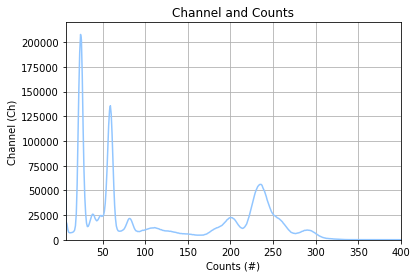

In [87]:
# Plot for Ba-133 Channel & Counts

# Energies of photons MeV (intensity %/d): .031 (.969),
# .035 (22.6%), .053 (2%), .0796 (3%), .081 (34%), .276 (7%),
# .303 (18%), .356 (62%), .383 (9%)

plt.style.use(['seaborn-pastel'])
plt.title('Channel and Counts')
plt.ylabel('Channel (Ch)')
plt.xlabel('Counts (#)')
pylab.xlim(7, 400)
pylab.ylim(0, 220000)
plt.grid()

plt.plot(df1.Channel, df1.Counts)

[2.03371116e+05 2.41735223e+01 2.51024469e+00 8.33396167e+03]


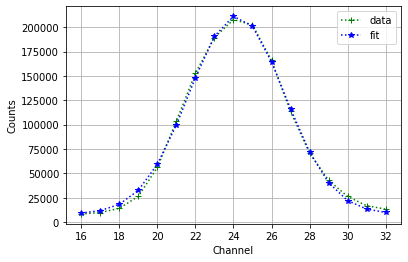

In [88]:
# Fit for peak 1 (Ba-133)

x1 = df1.Channel [15:32]
y1 = df1.Counts [15:32]

n=sum(y1)
mean = sum(x1*y1)/n                   
sigma=math.sqrt(sum(y1*(x1-mean)**2)/n)


def gaus(x1,a,x0,sigma,offset):
    return a*exp(-(x1-x0)**2/(2*sigma**2))+offset

popt1,pcov1 = curve_fit(gaus,x1,y1,p0=[1,mean,sigma, 0.0])
print(popt1)

plt.plot(x1,y1,'g+:',label='data')
plt.plot(x1,gaus(x1,*popt1),'b*:',label='fit')
plt.legend()
plt.xlabel('Channel')
plt.ylabel('Counts')
plt.grid()
plt.show()

In [89]:
err_Ba1 = np.sqrt(np.diag(pcov1))

print(err_Ba1)

[2.56285763e+03 3.08602881e-02 4.50023514e-02 1.90874129e+03]


/Users/anthonydam/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.
  return bound(*args, **kwds)


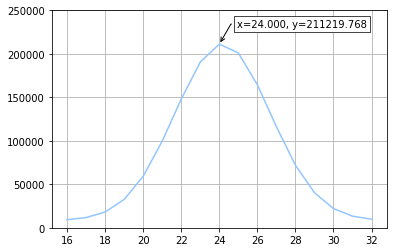

In [90]:
fig, ax = plt.subplots()
ax.plot(x1,gaus(x1,*popt1))

def annot_max(x1,y1, ax=None):
    xmax = x1[np.argmax(gaus(x1,*popt1))]
    ymax = gaus(x1,*popt1).max()
    text= "x={:.3f}, y={:.3f}".format(xmax, ymax)
    if not ax:
        ax=plt.gca()
    bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
    arrowprops=dict(arrowstyle="->",connectionstyle="angle,angleA=0,angleB=60")
    kw = dict(xycoords='data',textcoords="axes fraction",
              arrowprops=arrowprops, bbox=bbox_props, ha="right", va="top")
    ax.annotate(text, xy=(xmax, ymax), xytext=(0.94,0.96), **kw)

annot_max(x1,y1)


ax.set_ylim(0,250000)
plt.grid()
plt.show()

[1.66393281e+04 3.85097770e+01 3.21614968e+00 9.35115620e+03]


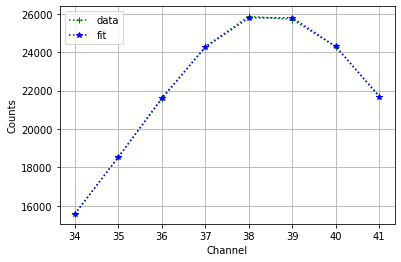

In [91]:
# Fit for peak 2 (Ba-133)

x1_1 = df1.Channel [33:41]
y1_1 = df1.Counts [33:41]

n=sum(y1_1)
mean = sum(x1_1*y1_1)/n                   
sigma=math.sqrt(sum(y1_1*(x1_1-mean)**2)/n)


def gaus(x1_1,a,x0,sigma,offset):
    return a*exp(-(x1_1-x0)**2/(2*sigma**2))+offset

popt2,pcov2 = curve_fit(gaus,x1_1,y1_1,p0=[1,mean,sigma, 0.0])
print(popt2)

plt.plot(x1_1,y1_1,'g+:',label='data')
plt.plot(x1_1,gaus(x1_1,*popt2),'b*:',label='fit')
plt.legend()
plt.xlabel('Channel')
plt.ylabel('Counts')
plt.grid()
plt.show()

In [92]:
err_Ba2 = np.sqrt(np.diag(pcov2))

print(err_Ba2)

[6.89067503e+02 1.51701561e-02 1.04586938e-01 7.14699239e+02]


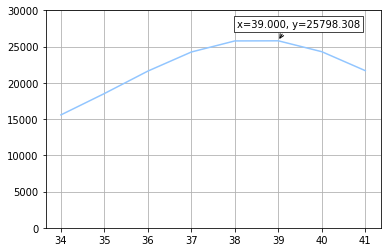

In [93]:
fig, ax = plt.subplots()
ax.plot(x1_1,gaus(x1_1,*popt2))

def annot_max(x1_1,y1_1, ax=None):
    xmax = x1_1[np.argmax(gaus(x1_1,*popt2))]
    ymax = gaus(x1_1,*popt2).max()
    text= "x={:.3f}, y={:.3f}".format(xmax, ymax)
    if not ax:
        ax=plt.gca()
    bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
    arrowprops=dict(arrowstyle="->",connectionstyle="angle,angleA=0,angleB=60")
    kw = dict(xycoords='data',textcoords="axes fraction",
              arrowprops=arrowprops, bbox=bbox_props, ha="right", va="top")
    ax.annotate(text, xy=(xmax, ymax), xytext=(0.94,0.96), **kw)

annot_max(x1_1,y1_1)


ax.set_ylim(0,30000)
plt.grid()
plt.show()

[1.31221620e+04 8.15148399e+01 3.34899860e+00 8.63277921e+03]


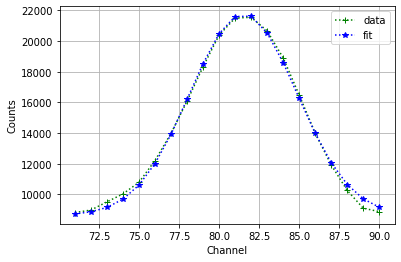

In [94]:
# Fit for peak 3 (Ba-133)

x1_2 = df1.Channel [70:90]
y1_2 = df1.Counts [70:90]

n=sum(y1_2)
mean = sum(x1_2*y1_2)/n                   
sigma=math.sqrt(sum(y1_2*(x1_2-mean)**2)/n)


def gaus(x1_2,a,x0,sigma,offset):
    return a*exp(-(x1_2-x0)**2/(2*sigma**2))+offset

popt3,pcov3 = curve_fit(gaus,x1_2,y1_2,p0=[1,mean,sigma, 0.0])
print(popt3)

plt.plot(x1_2,y1_2,'g+:',label='data')
plt.plot(x1_2,gaus(x1_2,*popt3),'b*:',label='fit')
plt.legend()
plt.xlabel('Channel')
plt.ylabel('Counts')
plt.grid()
plt.show()

In [95]:
err_Ba3 = np.sqrt(np.diag(pcov3))

print(err_Ba3)

[1.81885966e+02 4.08604789e-02 6.71593412e-02 1.57427621e+02]


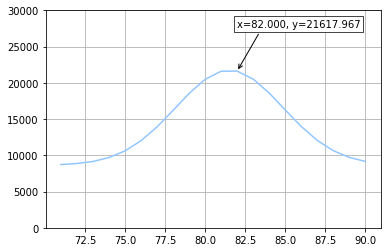

In [96]:
fig, ax = plt.subplots()
ax.plot(x1_2,gaus(x1_2,*popt3))

def annot_max(x1_2,y1_2, ax=None):
    xmax = x1_2[np.argmax(gaus(x1_2,*popt3))]
    ymax = gaus(x1_2,*popt3).max()
    text= "x={:.3f}, y={:.3f}".format(xmax, ymax)
    if not ax:
        ax=plt.gca()
    bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
    arrowprops=dict(arrowstyle="->",connectionstyle="angle,angleA=0,angleB=60")
    kw = dict(xycoords='data',textcoords="axes fraction",
              arrowprops=arrowprops, bbox=bbox_props, ha="right", va="top")
    ax.annotate(text, xy=(xmax, ymax), xytext=(0.94,0.96), **kw)

annot_max(x1_2,y1_2)


ax.set_ylim(0,30000)
plt.grid()
plt.show()

[ 1.11217423e+04  2.00290188e+02 -6.25960917e+00  1.14996191e+04]


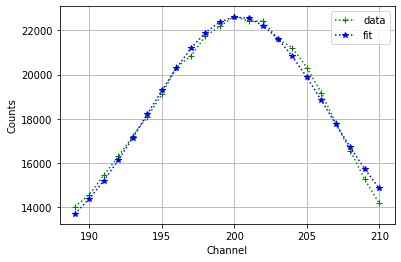

In [97]:
# Fit for peak 4 (Ba-133)

x1_3 = df1.Channel [188:210]
y1_3 = df1.Counts [188:210]

n=sum(y1_3)
mean = sum(x1_3*y1_3)/n                   
sigma=math.sqrt(sum(y1_3*(x1_3-mean)**2)/n)


def gaus(x1_3,a,x0,sigma,offset):
    return a*exp(-(x1_3-x0)**2/(2*sigma**2))+offset

popt4,pcov4 = curve_fit(gaus,x1_3,y1_3,p0=[1,mean,sigma, 0.0])
print(popt4)

plt.plot(x1_3,y1_3,'g+:',label='data')
plt.plot(x1_3,gaus(x1_3,*popt4),'b*:',label='fit')
plt.legend()
plt.xlabel('Channel')
plt.ylabel('Counts')
plt.grid()
plt.show()

In [98]:
err_Ba4 = np.sqrt(np.diag(pcov4))

print(err_Ba4)

[7.15431380e+02 7.91475901e-02 3.90026199e-01 7.66315859e+02]


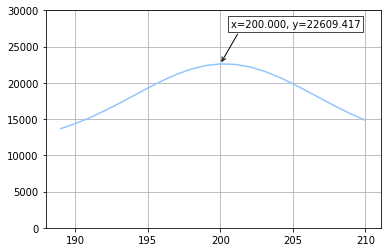

In [99]:
fig, ax = plt.subplots()
ax.plot(x1_3,gaus(x1_3,*popt4))

def annot_max(x1_3,y1_3, ax=None):
    xmax = x1_3[np.argmax(gaus(x1_3,*popt4))]
    ymax = gaus(x1_3,*popt4).max()
    text= "x={:.3f}, y={:.3f}".format(xmax, ymax)
    if not ax:
        ax=plt.gca()
    bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
    arrowprops=dict(arrowstyle="->",connectionstyle="angle,angleA=0,angleB=60")
    kw = dict(xycoords='data',textcoords="axes fraction",
              arrowprops=arrowprops, bbox=bbox_props, ha="right", va="top")
    ax.annotate(text, xy=(xmax, ymax), xytext=(0.94,0.96), **kw)

annot_max(x1_3,y1_3)


ax.set_ylim(0,30000)
plt.grid()
plt.show()

[5.10884402e+04 2.35318069e+02 9.89886892e+00 4.53984382e+03]


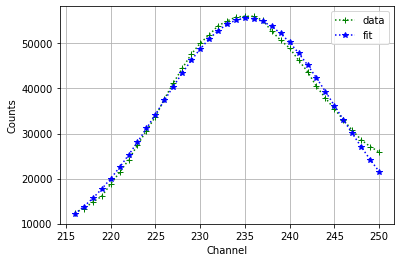

In [100]:
# Fit for peak 5 (Ba-133)

x1_4 = df1.Channel [215:250]
y1_4 = df1.Counts [215:250]

n=sum(y1_4)
mean = sum(x1_4*y1_4)/n                   
sigma=math.sqrt(sum(y1_4*(x1_4-mean)**2)/n)


def gaus(x1_4,a,x0,sigma,offset):
    return a*exp(-(x1_4-x0)**2/(2*sigma**2))+offset

popt5,pcov5 = curve_fit(gaus,x1_4,y1_4,p0=[1,mean,sigma, 0.0])
print(popt5)

plt.plot(x1_4,y1_4,'g+:',label='data')
plt.plot(x1_4,gaus(x1_4,*popt5),'b*:',label='fit')
plt.legend()
plt.xlabel('Channel')
plt.ylabel('Counts')
plt.grid()
plt.show()

In [101]:
err_Ba5 = np.sqrt(np.diag(pcov5))

print(err_Ba5)

[2.14766458e+03 1.02800409e-01 4.19114470e-01 2.30514504e+03]


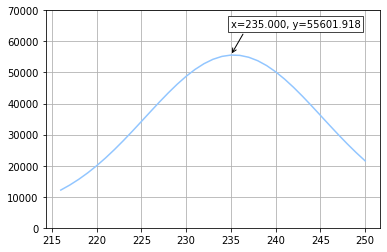

In [102]:
fig, ax = plt.subplots()
ax.plot(x1_4,gaus(x1_4,*popt5))

def annot_max(x1_4,y1_4, ax=None):
    xmax = x1_4[np.argmax(gaus(x1_4,*popt5))]
    ymax = gaus(x1_4,*popt5).max()
    text= "x={:.3f}, y={:.3f}".format(xmax, ymax)
    if not ax:
        ax=plt.gca()
    bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
    arrowprops=dict(arrowstyle="->",connectionstyle="angle,angleA=0,angleB=60")
    kw = dict(xycoords='data',textcoords="axes fraction",
              arrowprops=arrowprops, bbox=bbox_props, ha="right", va="top")
    ax.annotate(text, xy=(xmax, ymax), xytext=(0.94,0.96), **kw)

annot_max(x1_4,y1_4)


ax.set_ylim(0,70000)
plt.grid()
plt.show()

[9353.28188554  289.59268958  -10.617019    535.79127934]


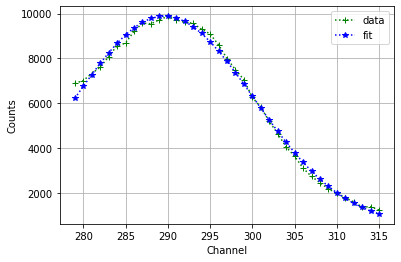

In [103]:
# Fit for peak 6 (Ba-133)

x1_5 = df1.Channel [278:315]
y1_5 = df1.Counts [278:315]

n=sum(y1_5)
mean = sum(x1_5*y1_5)/n                   
sigma=math.sqrt(sum(y1_5*(x1_5-mean)**2)/n)


def gaus(x1_5,a,x0,sigma,offset):
    return a*exp(-(x1_5-x0)**2/(2*sigma**2))+offset

popt6,pcov6 = curve_fit(gaus,x1_5,y1_5,p0=[1,mean,sigma, 0.0])
print(popt6)

plt.plot(x1_5,y1_5,'g+:',label='data')
plt.plot(x1_5,gaus(x1_5,*popt6),'b*:',label='fit')
plt.legend()
plt.xlabel('Channel')
plt.ylabel('Counts')
plt.grid()
plt.show()

In [104]:
err_Ba6 = np.sqrt(np.diag(pcov6))

print(err_Ba6)

[1.56768165e+02 1.06653489e-01 2.40594704e-01 1.68264878e+02]


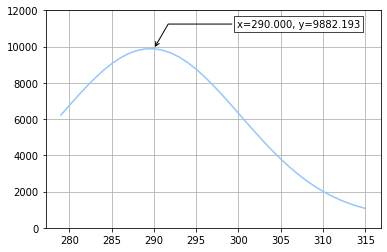

In [105]:
fig, ax = plt.subplots()
ax.plot(x1_5,gaus(x1_5,*popt6))

def annot_max(x1_5,y1_5, ax=None):
    xmax = x1_5[np.argmax(gaus(x1_5,*popt6))]
    ymax = gaus(x1_5,*popt6).max()
    text= "x={:.3f}, y={:.3f}".format(xmax, ymax)
    if not ax:
        ax=plt.gca()
    bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
    arrowprops=dict(arrowstyle="->",connectionstyle="angle,angleA=0,angleB=60")
    kw = dict(xycoords='data',textcoords="axes fraction",
              arrowprops=arrowprops, bbox=bbox_props, ha="right", va="top")
    ax.annotate(text, xy=(xmax, ymax), xytext=(0.94,0.96), **kw)

annot_max(x1_5,y1_5)


ax.set_ylim(0,12000)
plt.grid()
plt.show()

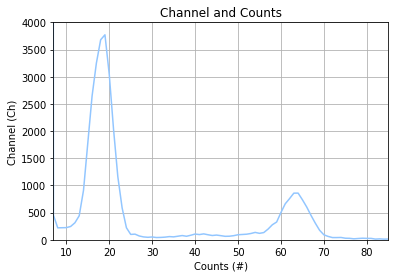

In [106]:
# Plot for Cd-109 Channel & Counts

plt.style.use(['seaborn-pastel'])
plt.title('Channel and Counts')
plt.ylabel('Channel (Ch)')
plt.xlabel('Counts (#)')
pylab.xlim(7, 85)
pylab.ylim(0, 4000)
plt.grid()

plt.plot(df2.Channel, df2.Counts)

[ 3.79336954e+03  1.82129859e+01 -2.51421967e+00  1.08969976e+01]


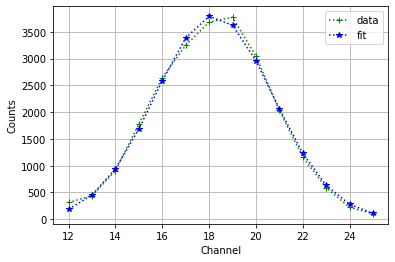

In [107]:
# Fit for peak 1 (Cd-109)

x2 = df2.Channel[11:25]
y2 = df2.Counts [11:25]

n=sum(y2)
mean = sum(x2*y2)/n                   
sigma=math.sqrt(sum(y2*(x2-mean)**2)/n)


def gaus(x2,a,x0,sigma,offset):
    return a*exp(-(x2-x0)**2/(2*sigma**2))+offset

popt7,pcov7 = curve_fit(gaus,x2,y2,p0=[1,mean,sigma, 0.0])
print(popt7)

plt.plot(x2,y2,'g+:',label='data')
plt.plot(x2,gaus(x2,*popt7),'b*:',label='fit')
plt.legend()
plt.xlabel('Channel')
plt.ylabel('Counts')
plt.grid()
plt.show()

In [108]:
err_Cd1 = np.sqrt(np.diag(pcov7))

print(err_Cd1)

[8.51639021e+01 4.44774557e-02 8.30751491e-02 8.17319315e+01]


/Users/anthonydam/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.
  return bound(*args, **kwds)


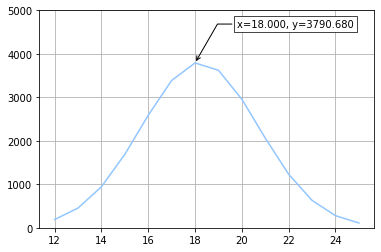

In [109]:
fig, ax = plt.subplots()
ax.plot(x2,gaus(x2,*popt7))

def annot_max(x2,y2, ax=None):
    xmax = x2[np.argmax(gaus(x2,*popt7))]
    ymax = gaus(x2,*popt7).max()
    text= "x={:.3f}, y={:.3f}".format(xmax, ymax)
    if not ax:
        ax=plt.gca()
    bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
    arrowprops=dict(arrowstyle="->",connectionstyle="angle,angleA=0,angleB=60")
    kw = dict(xycoords='data',textcoords="axes fraction",
              arrowprops=arrowprops, bbox=bbox_props, ha="right", va="top")
    ax.annotate(text, xy=(xmax, ymax), xytext=(0.94,0.96), **kw)

annot_max(x2,y2)


ax.set_ylim(0,5000)
plt.grid()
plt.show()

[781.90206673  63.2946326   -2.99141602  76.4304059 ]


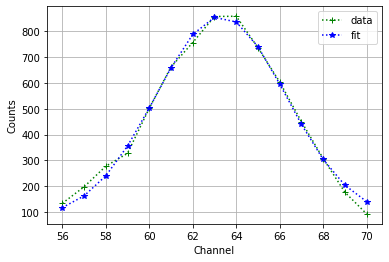

In [110]:
# Fit for peak 2 (Cd-109)

x2_1 = df2.Channel [55:70]
y2_1 = df2.Counts [55:70]

n=sum(y2_1)
mean = sum(x2_1*y2_1)/n                   
sigma=math.sqrt(sum(y2_1*(x2_1-mean)**2)/n)


def gaus(x2_1,a,x0,sigma,offset):
    return a*exp(-(x2_1-x0)**2/(2*sigma**2))+offset

popt8,pcov8 = curve_fit(gaus,x2_1,y2_1,p0=[1,mean,sigma, 0.0])
print(popt8)

plt.plot(x2_1,y2_1,'g+:',label='data')
plt.plot(x2_1,gaus(x2_1,*popt8),'b*:',label='fit')
plt.legend()
plt.xlabel('Channel')
plt.ylabel('Counts')
plt.grid()
plt.show()

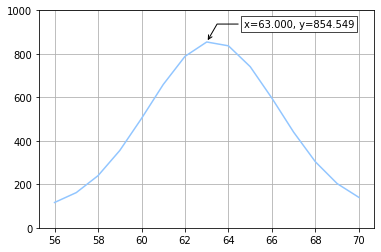

In [111]:
fig, ax = plt.subplots()
ax.plot(x2_1,gaus(x2_1,*popt8))

def annot_max(x2_1,y2_1, ax=None):
    xmax = x2_1[np.argmax(gaus(x2_1,*popt8))]
    ymax = gaus(x2_1,*popt8).max()
    text= "x={:.3f}, y={:.3f}".format(xmax, ymax)
    if not ax:
        ax=plt.gca()
    bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
    arrowprops=dict(arrowstyle="->",connectionstyle="angle,angleA=0,angleB=60")
    kw = dict(xycoords='data',textcoords="axes fraction",
              arrowprops=arrowprops, bbox=bbox_props, ha="right", va="top")
    ax.annotate(text, xy=(xmax, ymax), xytext=(0.94,0.96), **kw)

annot_max(x2_1,y2_1)


ax.set_ylim(0,1000)
plt.grid()
plt.show()

In [112]:
err_Cd2 = np.sqrt(np.diag(pcov8))

print(err_Cd2)

[27.14597908  0.0653089   0.14695775 28.481237  ]


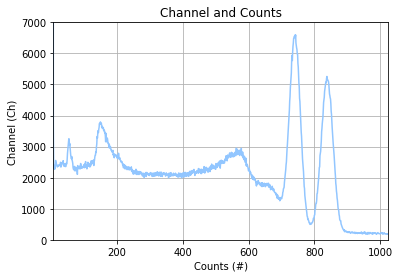

In [113]:
# Plot for Co-60 Channel & Counts

plt.style.use(['seaborn-pastel'])
plt.title('Channel and Counts')
plt.ylabel('Channel (Ch)')
plt.xlabel('Counts (#)')
pylab.xlim(7, 1024)
pylab.ylim(0, 7000)
plt.grid()

plt.plot(df3.Channel, df3.Counts)

[5610.94670567  740.06460778   15.36917759  997.33626768]


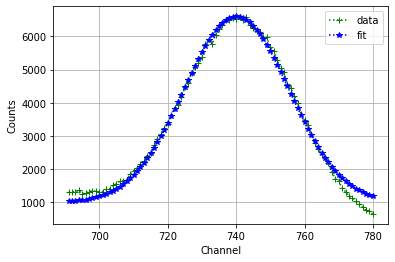

In [114]:
# Fit for peak 1 (Co-60)

x3 = df3.Channel[690:780]
y3 = df3.Counts [690:780]

n=sum(y3)
mean = sum(x3*y3)/n                   
sigma=math.sqrt(sum(y3*(x3-mean)**2)/n)


def gaus(x3,a,x0,sigma,offset):
    return a*exp(-(x3-x0)**2/(2*sigma**2))+offset

popt9,pcov9 = curve_fit(gaus,x3,y3,p0=[1,mean,sigma, 0.0])
print(popt9)

plt.plot(x3,y3,'g+:',label='data')
plt.plot(x3,gaus(x3,*popt9),'b*:',label='fit')
plt.legend()
plt.xlabel('Channel')
plt.ylabel('Counts')
plt.grid()
plt.show()

In [115]:
err_Co1 = np.sqrt(np.diag(pcov9))

print(err_Co1)

[60.10923306  0.14178915  0.23825076 53.16832487]


/Users/anthonydam/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.
  return bound(*args, **kwds)


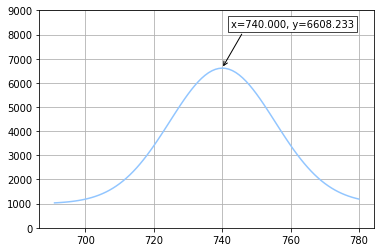

In [116]:
fig, ax = plt.subplots()
ax.plot(x3,gaus(x3,*popt9))

def annot_max(x3,y3, ax=None):
    xmax = x3[np.argmax(gaus(x3,*popt9))]
    ymax = gaus(x3,*popt9).max()
    text= "x={:.3f}, y={:.3f}".format(xmax, ymax)
    if not ax:
        ax=plt.gca()
    bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
    arrowprops=dict(arrowstyle="->",connectionstyle="angle,angleA=0,angleB=60")
    kw = dict(xycoords='data',textcoords="axes fraction",
              arrowprops=arrowprops, bbox=bbox_props, ha="right", va="top")
    ax.annotate(text, xy=(xmax, ymax), xytext=(0.94,0.96), **kw)

annot_max(x3,y3)


ax.set_ylim(0,9000)
plt.grid()
plt.show()

[4817.04800984  838.73142013   17.41827791  374.75199693]


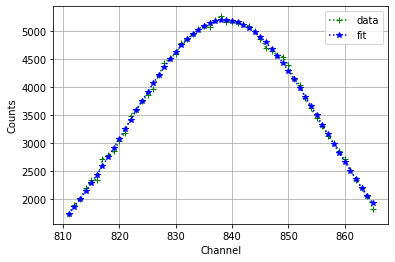

In [117]:
# Fit for peak 2 (Co-60)

x3_1 = df3.Channel [810:865]
y3_1 = df3.Counts [810:865]

n=sum(y3_1)
mean = sum(x3_1*y3_1)/n                   
sigma=math.sqrt(sum(y3_1*(x3_1-mean)**2)/n)


def gaus(x3_1,a,x0,sigma,offset):
    return a*exp(-(x3_1-x0)**2/(2*sigma**2))+offset

popt10,pcov10 = curve_fit(gaus,x3_1,y3_1,p0=[1,mean,sigma, 0.0])
print(popt10)

plt.plot(x3_1,y3_1,'g+:',label='data')
plt.plot(x3_1,gaus(x3_1,*popt10),'b*:',label='fit')
plt.legend()
plt.xlabel('Channel')
plt.ylabel('Counts')
plt.grid()
plt.show()

In [118]:
err_Co2 = np.sqrt(np.diag(pcov10))

print(err_Co2)

[1.23923088e+02 5.31982846e-02 3.82580586e-01 1.30331535e+02]


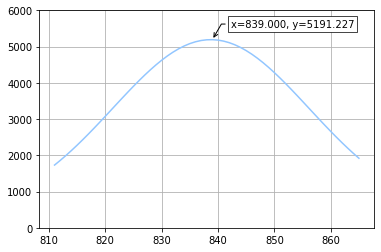

In [119]:
fig, ax = plt.subplots()
ax.plot(x3_1,gaus(x3_1,*popt10))

def annot_max(x3_1,y3_1, ax=None):
    xmax = x3_1[np.argmax(gaus(x3_1,*popt10))]
    ymax = gaus(x3_1,*popt10).max()
    text= "x={:.3f}, y={:.3f}".format(xmax, ymax)
    if not ax:
        ax=plt.gca()
    bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
    arrowprops=dict(arrowstyle="->",connectionstyle="angle,angleA=0,angleB=60")
    kw = dict(xycoords='data',textcoords="axes fraction",
              arrowprops=arrowprops, bbox=bbox_props, ha="right", va="top")
    ax.annotate(text, xy=(xmax, ymax), xytext=(0.94,0.96), **kw)

annot_max(x3_1,y3_1)


ax.set_ylim(0,6000)
plt.grid()
plt.show()

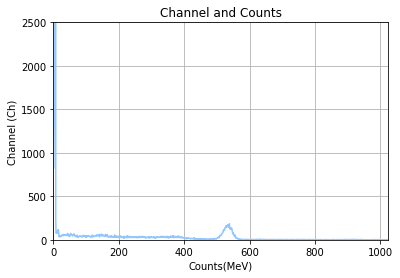

In [120]:
# Plot of Mn-54 Channel and Counts

plt.style.use(['seaborn-pastel'])
plt.title('Channel and Counts')
plt.ylabel('Channel (Ch)')
plt.xlabel('Counts(MeV)')
pylab.xlim(0, 1024)
pylab.ylim(0, 2500)
plt.grid()

plt.plot(df4.Channel, df4.Counts)

[156.61089662 532.96764233  13.41514676   5.22453416]


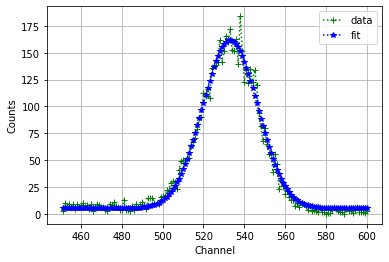

In [121]:
# Fit for peak 1 (Mn-54)

x4 = df4.Channel[450:600]
y4 = df4.Counts [450:600]

n=sum(y4)
mean = sum(x4*y4)/n                   
sigma=math.sqrt(sum(y4*(x4-mean)**2)/n)


def gaus(x4,a,x0,sigma,offset):
    return a*exp(-(x4-x0)**2/(2*sigma**2))+offset

popt11,pcov11 = curve_fit(gaus,x4,y4,p0=[1,mean,sigma, 0.0])
print(popt11)

plt.plot(x4,y4,'g+:',label='data')
plt.plot(x4,gaus(x4,*popt11),'b*:',label='fit')
plt.legend()
plt.xlabel('Channel')
plt.ylabel('Counts')
plt.grid()
plt.show()

In [122]:
err_Mn1 = np.sqrt(np.diag(pcov11))

print(err_Mn1)

[1.73811426 0.16386026 0.18699076 0.74365833]


/Users/anthonydam/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.
  return bound(*args, **kwds)


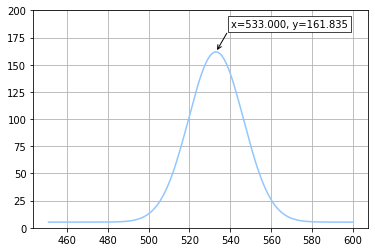

In [123]:
fig, ax = plt.subplots()
ax.plot(x4,gaus(x4,*popt11))

def annot_max(x4,y4, ax=None):
    xmax = x4[np.argmax(gaus(x4,*popt11))]
    ymax = gaus(x4,*popt11).max()
    text= "x={:.3f}, y={:.3f}".format(xmax, ymax)
    if not ax:
        ax=plt.gca()
    bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
    arrowprops=dict(arrowstyle="->",connectionstyle="angle,angleA=0,angleB=60")
    kw = dict(xycoords='data',textcoords="axes fraction",
              arrowprops=arrowprops, bbox=bbox_props, ha="right", va="top")
    ax.annotate(text, xy=(xmax, ymax), xytext=(0.94,0.96), **kw)

annot_max(x4,y4)


ax.set_ylim(0,200)
plt.grid()
plt.show()

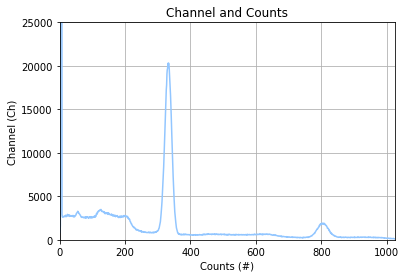

In [124]:
# Plot for Na-22 Channel & Counts, ignoring backscatter.

plt.style.use(['seaborn-pastel'])
plt.title('Channel and Counts')
plt.ylabel('Channel (Ch)')
plt.xlabel('Counts (#)')
pylab.xlim(0, 1024)
pylab.ylim(0, 25000)
plt.grid()

plt.plot(df5.Channel, df5.Counts)

[1.97547631e+04 3.31995301e+02 1.03031637e+01 6.09805484e+02]


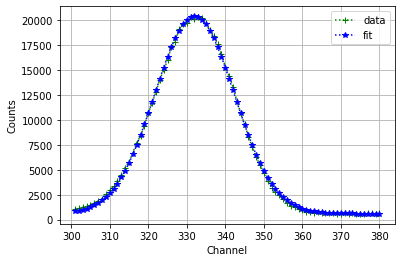

In [125]:
# Fit for peak 1 (Na-22)

x5 = df5.Channel[300:380]
y5 = df5.Counts [300:380]

n=sum(y5)
mean = sum(x5*y5)/n                   
sigma=math.sqrt(sum(y5*(x5-mean)**2)/n)


def gaus(x5,a,x0,sigma,offset):
    return a*exp(-(x5-x0)**2/(2*sigma**2))+offset

popt12,pcov12 = curve_fit(gaus,x5,y5,p0=[1,mean,sigma, 0.0])
print(popt12)

plt.plot(x5,y5,'g+:',label='data')
plt.plot(x5,gaus(x5,*popt12),'b*:',label='fit')
plt.legend()
plt.xlabel('Channel')
plt.ylabel('Counts')
plt.grid()
plt.show()

In [126]:
err_Na1 = np.sqrt(np.diag(pcov12))

print(err_Na1)

[6.53722161e+01 3.53166852e-02 4.56290852e-02 4.00270491e+01]


/Users/anthonydam/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.
  return bound(*args, **kwds)


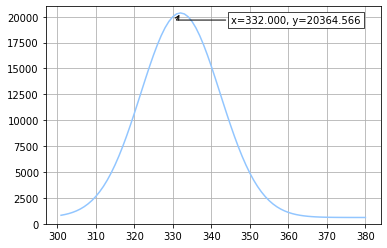

In [127]:
fig, ax = plt.subplots()
ax.plot(x5,gaus(x5,*popt12))

def annot_max(x5,y5, ax=None):
    xmax = x5[np.argmax(gaus(x5,*popt12))]
    ymax = gaus(x5,*popt12).max()
    text= "x={:.3f}, y={:.3f}".format(xmax, ymax)
    if not ax:
        ax=plt.gca()
    bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
    arrowprops=dict(arrowstyle="->",connectionstyle="angle,angleA=0,angleB=60")
    kw = dict(xycoords='data',textcoords="axes fraction",
              arrowprops=arrowprops, bbox=bbox_props, ha="right", va="top")
    ax.annotate(text, xy=(xmax, ymax), xytext=(0.94,0.96), **kw)

annot_max(x5,y5)


ax.set_ylim(0,21000)
plt.grid()
plt.show()

[1604.21795683  804.7734797    16.38216046  291.08796433]


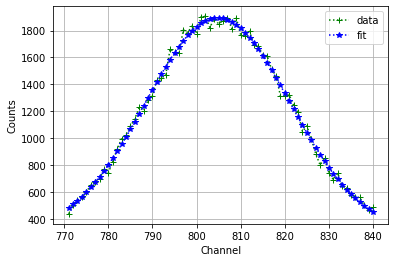

In [128]:
# Fit for peak 2 (Na-22)

x5_1 = df5.Channel [770:840]
y5_1 = df5.Counts [770:840]

n=sum(y5_1)
mean = sum(x5_1*y5_1)/n                   
sigma=math.sqrt(sum(y5_1*(x5_1-mean)**2)/n)


def gaus(x5_1,a,x0,sigma,offset):
    return a*exp(-(x5_1-x0)**2/(2*sigma**2))+offset

popt13,pcov13 = curve_fit(gaus,x5_1,y5_1,p0=[1,mean,sigma, 0.0])
print(popt13)

plt.plot(x5_1,y5_1,'g+:',label='data')
plt.plot(x5_1,gaus(x5_1,*popt13),'b*:',label='fit')
plt.legend()
plt.xlabel('Channel')
plt.ylabel('Counts')
plt.grid()
plt.show()

In [129]:
err_Na2 = np.sqrt(np.diag(pcov13))

print(err_Na2)

[27.01367947  0.10507066  0.33532849 29.60238769]


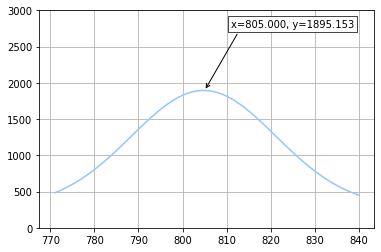

In [130]:
fig, ax = plt.subplots()
ax.plot(x5_1,gaus(x5_1,*popt13))

def annot_max(x5_1,y5_1, ax=None):
    xmax = x5_1[np.argmax(gaus(x5_1,*popt13))]
    ymax = gaus(x5_1,*popt13).max()
    text= "x={:.3f}, y={:.3f}".format(xmax, ymax)
    if not ax:
        ax=plt.gca()
    bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
    arrowprops=dict(arrowstyle="->",connectionstyle="angle,angleA=0,angleB=60")
    kw = dict(xycoords='data',textcoords="axes fraction",
              arrowprops=arrowprops, bbox=bbox_props, ha="right", va="top")
    ax.annotate(text, xy=(xmax, ymax), xytext=(0.94,0.96), **kw)

annot_max(x5_1,y5_1)


ax.set_ylim(0,3000)
plt.grid()
plt.show()

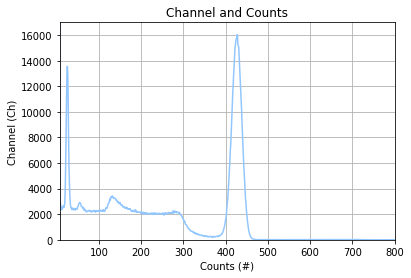

In [131]:
# Plot for Unknown Channel & Counts, ignoring backscatter.

plt.style.use(['seaborn-pastel'])
plt.title('Channel and Counts')
plt.ylabel('Channel (Ch)')
plt.xlabel('Counts (#)')
pylab.xlim(7, 800)
pylab.ylim(0, 17000)
plt.grid()

plt.plot(df6.Channel, df6.Counts)

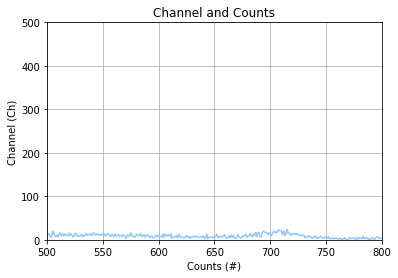

In [152]:
# Plot for Unknown Channel & Counts, ignoring backscatter zoomed in

plt.style.use(['seaborn-pastel'])
plt.title('Channel and Counts')
plt.ylabel('Channel (Ch)')
plt.xlabel('Counts (#)')
pylab.xlim(500, 800)
pylab.ylim(0, 500)
plt.grid()

plt.plot(df6.Channel, df6.Counts)

[1.57188000e+04 4.26391124e+02 1.16342865e+01 2.13135139e+02]


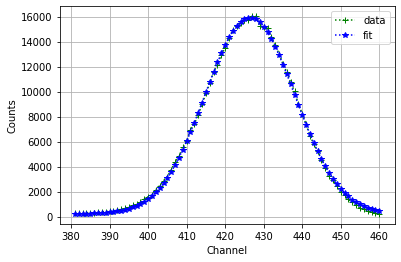

In [153]:
# Fit for peak 1 (Unknown)

x6_1 = df6.Channel [380:460]
y6_1 = df6.Counts [380:460]

n=sum(y6_1)
mean = sum(x6_1*y6_1)/n                   
sigma=math.sqrt(sum(y6_1*(x6_1-mean)**2)/n)


def gaus(x6_1,a,x0,sigma,offset):
    return a*exp(-(x6_1-x0)**2/(2*sigma**2))+offset

popt14,pcov14 = curve_fit(gaus,x6_1,y6_1,p0=[1,mean,sigma, 0.0])
print(popt14)

plt.plot(x6_1,y6_1,'g+:',label='data')
plt.plot(x6_1,gaus(x6_1,*popt14),'b*:',label='fit')
plt.legend()
plt.xlabel('Channel')
plt.ylabel('Counts')
plt.grid()
plt.show()

In [154]:
err_Un1 = np.sqrt(np.diag(pcov14))

print(err_Un1)

[5.28093658e+01 3.85475069e-02 5.43401241e-02 3.77469338e+01]


/Users/anthonydam/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.
  return bound(*args, **kwds)


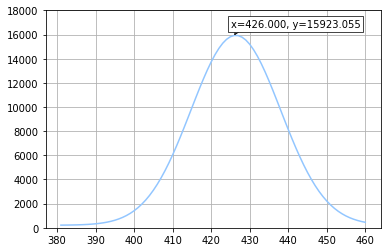

In [155]:
fig, ax = plt.subplots()
ax.plot(x6_1,gaus(x6_1,*popt14))

def annot_max(x6_1,y6_1, ax=None):
    xmax = x6_1[np.argmax(gaus(x6_1,*popt14))]
    ymax = gaus(x6_1,*popt14).max()
    text= "x={:.3f}, y={:.3f}".format(xmax, ymax)
    if not ax:
        ax=plt.gca()
    bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
    arrowprops=dict(arrowstyle="->",connectionstyle="angle,angleA=0,angleB=60")
    kw = dict(xycoords='data',textcoords="axes fraction",
              arrowprops=arrowprops, bbox=bbox_props, ha="right", va="top")
    ax.annotate(text, xy=(xmax, ymax), xytext=(0.94,0.96), **kw)

annot_max(x6_1,y6_1)


ax.set_ylim(0,18000)
plt.grid()
plt.show()

[ 11.76407334 705.63397541  14.92220131   5.98808696]


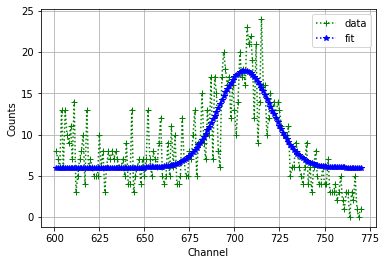

In [158]:
# Fit for peak 3 (Unknown)

x6_2 = df6.Channel [600:770]
y6_2 = df6.Counts [600:770]

n=sum(y6_2)
mean = sum(x6_2*y6_2)/n                   
sigma=math.sqrt(sum(y6_2*(x6_2-mean)**2)/n)


def gaus(x6_2,a,x0,sigma,offset):
    return a*exp(-(x6_2-x0)**2/(2*sigma**2))+offset

popt15,pcov15 = curve_fit(gaus,x6_2,y6_2,p0=[1,mean,sigma, 0.0])
print(popt15)

plt.plot(x6_2,y6_2,'g+:',label='data')
plt.plot(x6_2,gaus(x6_2,*popt15),'b*:',label='fit')
plt.legend()
plt.xlabel('Channel')
plt.ylabel('Counts')
plt.grid()
plt.show()

In [159]:
err_Un1 = np.sqrt(np.diag(pcov15))

print(err_Un2)

[5.28093658e+01 3.85475069e-02 5.43401241e-02 3.77469338e+01]


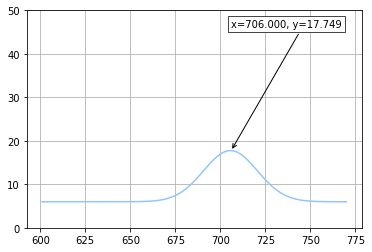

In [162]:
fig, ax = plt.subplots()
ax.plot(x6_2,gaus(x6_2,*popt15))

def annot_max(x6_2,y6_2, ax=None):
    xmax = x6_2[np.argmax(gaus(x6_2,*popt15))]
    ymax = gaus(x6_2,*popt15).max()
    text= "x={:.3f}, y={:.3f}".format(xmax, ymax)
    if not ax:
        ax=plt.gca()
    bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
    arrowprops=dict(arrowstyle="->",connectionstyle="angle,angleA=0,angleB=60")
    kw = dict(xycoords='data',textcoords="axes fraction",
              arrowprops=arrowprops, bbox=bbox_props, ha="right", va="top")
    ax.annotate(text, xy=(xmax, ymax), xytext=(0.94,0.96), **kw)

annot_max(x6_2,y6_2)


ax.set_ylim(0,50)
plt.grid()
plt.show()

622.1732320875051 16.57045921092235


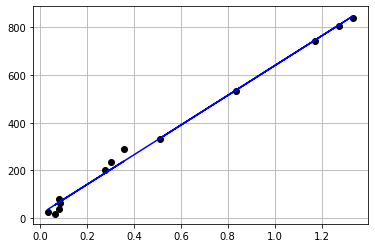

In [157]:
x = [.035, .0796, .081, .276, .303, .356, .063, .084, 1.1732, 1.3325, .835, .511, 1.275]
y = [24, 39, 82, 200, 235, 290, 18, 63, 740, 839, 533, 332, 805]

fit = np.polyfit(x,y,1)

y_fit = np.poly1d(fit) 

print(m,b)
plt.grid()
plt.plot(x, y, 'ko')
plt.plot(x, y_fit(x), 'b-')

In [ ]:
Ag-110
Ni-65